## 5. 저장된 학습모델로 금값 예측하기

앞서 저장한 학습 모델이 제대로 작동하는지 확인해 보겠습니다.

In [ ]:
import tensorflow as tf
import numpy as np
# 텐서플로우와 넘파이를 불러옵니다.

In [ ]:
W = tf.Variable(tf.random_uniform([1]), name="weight")
b = tf.Variable(tf.random_uniform([1]), name="bias")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# X, Y 플레이스 홀더와 가중치와 바이어스를 설정합니다.

In [ ]:
hypothesis = W * X + b
# 가설을 설정합니다.

In [ ]:
saver = tf.train.Saver()
model = tf.global_variables_initializer();
# saver 함수로 저장된 모델을 불러오는 객체를 선언하고

In [ ]:
silver_temp = float(input('은 가격: '))
# 사용자로부터 은 가격을 silver_temp에 입력받도록 합니다.

In [10]:
with tf.Session() as sess:
    sess.run(model)
    save_path = "./saved.cpkt"
    saver.restore(sess, save_path)

    data = ((silver_temp), (0))
    arr = np.array(data, dtype=np.float32)

    x_data = arr[0:1]
    dict = sess.run(hypothesis, feed_dict={X: x_data})
    print('예측된 금 가격:', dict[0])
    # 학습 모델을 파일로부터 불러와서 변인이 1개 이기 때문에
    # 입력 값을 이용해 1열의 배열을 만들고 예측을 수행하고 결과를 출력합니다. 

INFO:tensorflow:Restoring parameters from ./saved.cpkt
예측된 금 가격: 1209.8297


---------------
## 6. 웹 디자인 구현

코드 구현은 끝났으며 웹 구현에 대해 설명해드리겠습니다.  
디자인은 템플릿을 저희 의도에 맞게 수정했으며 그외 웹 서버가 작동하는데 중요한 부분을 중점적으로 설명하겠습니다.

웹 구현에 앞서 Flask, MDBootstrap 템플릿 다운로드가 필요합니다.
우선 파일들을 정리하겠습니다.


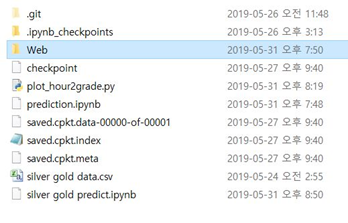

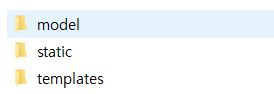

‘Web’ 폴더를 만들고 각각
‘model’, ‘static’, ‘templates’ 폴더를 생성합니다.

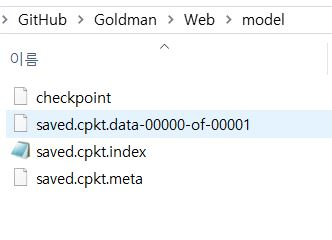


‘model’에는 checkpoint와 saved.cpkt와 관련된 파일 3개를 옮겨줍니다.


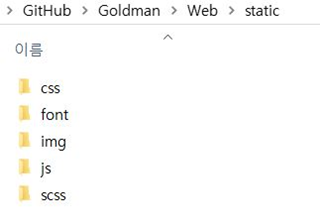

‘static’에는 각각
‘css’, ‘font’, ‘img’, ‘js’, ‘scss’폴더를 옮겨줍니다. 
MDBootstrap에서 받은 템플릿 관련 폴더를 옮겨주는 것으로 디자인을 위해 사용되는 폴더입니다.


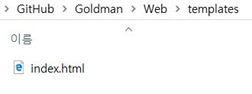
‘templates’ 폴더에는 웹, ‘index.html’을 넣으면 됩니다.


-----------

‘server.py’를 UTF-8 인코딩으로
파일 생성 후에 Flask 기본설정 및
플레이스 홀더, 가설, saver 함수 등을 작성합니다.

웹 구현은 디자인적인 부분을 제외하고 결국 ‘server.py’를 통해 코드를 실행하며  
html과의 연계를 함으로써 form group을 통해 입력값을 받고   
html의 {{price}}로 계산값을 return하여 출력해내는 것이 핵심입니다.

‘index.html’을 열어서 입력값을 받기 위해
form group을 생성하고 input style에 name=“silver_temp”을 작성합니다.

추가적으로 결과값을 출력하기 위해
{{price}}를 사용하면 되겠습니다.

이외에 그림이나 스타일 양식 같은 경우는 ‘url_for’를 사용하여 경로 지정에 유의하면 됩니다.


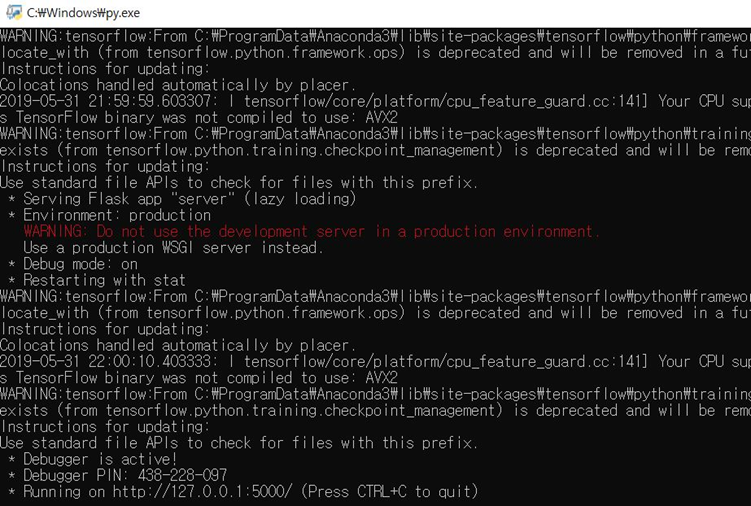  

‘server.py’를 실행하여 ’ http://127.0.0.1:5000/ ’가 출력되면 됩니다.

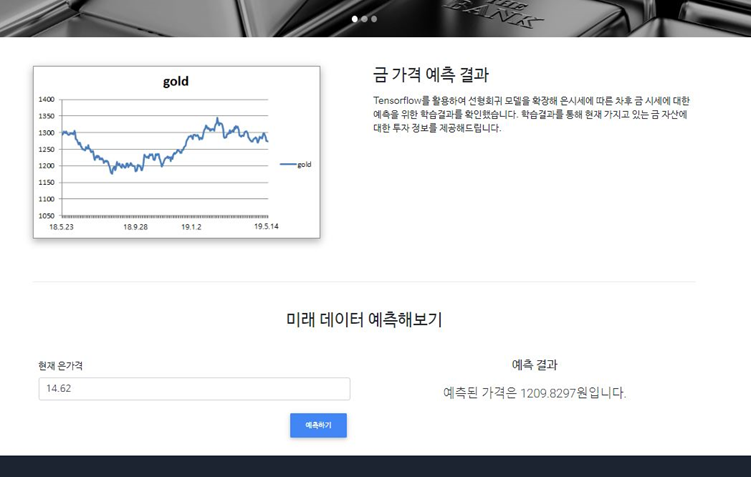  
’ http://127.0.0.1:5000/ ’ 또는 ‘http://localhost:5000/‘ 로 접속할 수 있으며
은 가격을 입력하여 금 가격을 예측할 수 있습니다.

-----------------
## 7. 적용

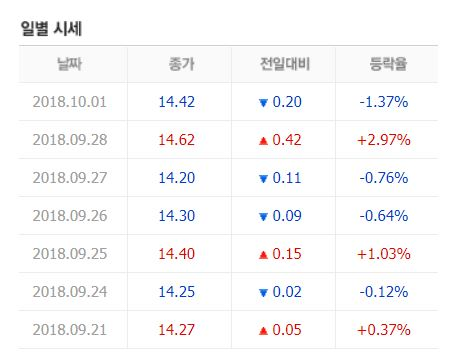  
< 은 일별 시세 >

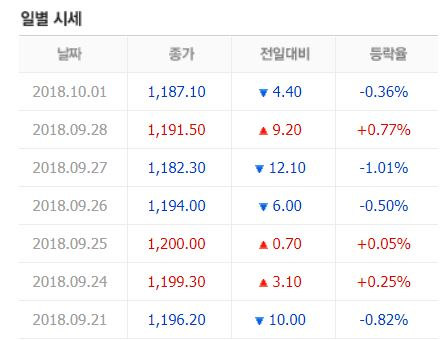  
<금 일별 시세>


2018년도 9월 28일은 시세가 14.62까지 치솟은 후 상승세를 유지하였는데  
이 때 예측금값은 1209.82달러로 실제 금값보다 높았기에 상승 예측이 되었습니다.

------------

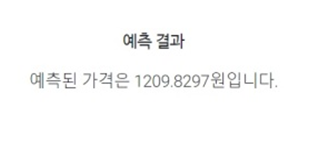
<머신러닝 모델을 통해 예측한 9월28일 금값>

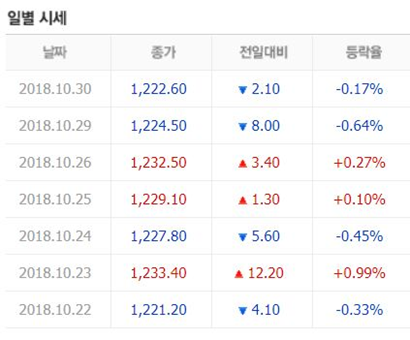  
<한달 후 금값>
<br>
<br>
실제로 약 1달 정도 후에 금값이 예측값을 넘게 되었으며 수요와 공급의 균형에 따라
은시세와 금시세가 영향을 주고 받음을 확인할 수 있었습니다.  
 금 은 퀀트 투자 AI 프로젝트는 Tensorflow를 활용하여
선형회귀 모델을 확장해 은 시세에 따른 차후 금 시세에 대한 예측을 위해 개발되었습니다.

-----------------
## 8. 은과 금, 무엇이 leading index인지에 관하여

은과 금의 관계에 있어서 leading index, 선행지수가 무엇인지에 대해서는 의견이 분분합니다. <br>
골드가 은을 이끈다는 의견도 있고 은이 골드의 선행지수라는 분석도 있었습니다.
 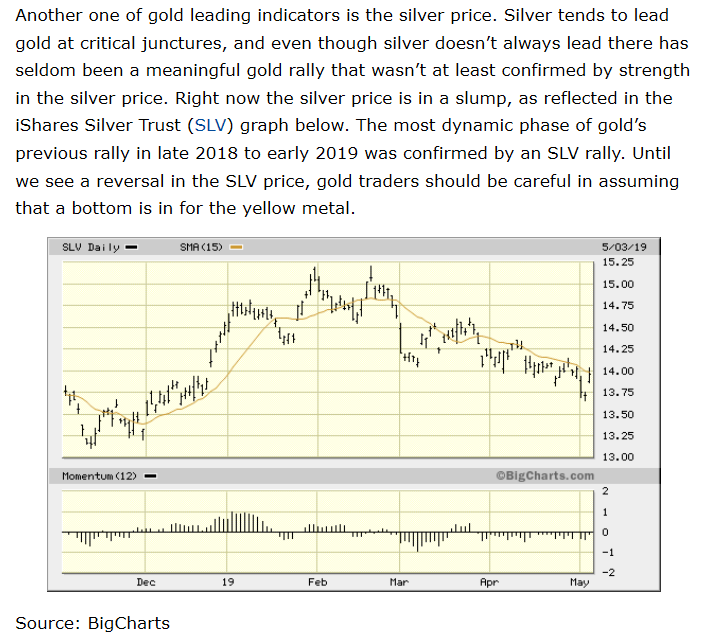
<출처 : https://seekingalpha.com/article/4260464-golds-leading-indicators-say-not-yet>
<br>보시면 노란색 선이 gold의 15일선이고 검은색이 은의 1일선입니다.
매번 은이 금을 이끄는 것은 아니지만 중요한 시점에 금 가격을 이끄는 선행지수로 작용한다는 분석이 있습니다.

저희는 silver가 gold의 leading index라는 분석과 수요 공급의 관계에 관련하여
두 가격 사이의 상관관계를 알아보기 위해 선형회귀 분석을 사용하였으며 이로부터 금 은 퀀트 투자 AI 프로젝트를 진행하였습니다.